In [2]:
# Import tensorflow
import tensorflow as tf
# Load breast cancer data from sklearn
from sklearn.datasets import load_breast_cancer


In [3]:
# Load the data
data = load_breast_cancer()
type(data) # A Bunch data type works like a dictionary and the attributes are the keys

sklearn.utils.Bunch

In [4]:
data.keys() # 'data' and 'target' refer to the input data X and the targets Y

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data.data.shape # We see that we have 569 observations and 30 features

(569, 30)

In [6]:
print(data.target.shape)
data.target # A bunch of 0 and 1

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
# Now we will split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train_full,X_test,y_train_full,y_test = train_test_split(data.data,data.target,test_size = 0.2)
X_valid,X_train = X_train_full[:100],X_train_full[100:]
y_valid,y_train = y_train_full[:100],y_train_full[100:]
N, D = X_train.shape

In [12]:
# Preprocessing
## Scale the data
from sklearn.preprocessing import StandardScaler

### Scaling the data is very important in deeplearning, we want the inputs to have the same range
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # We only fit on the training set
X_valid = scaler.transform(X_valid) # We don't fit on the valid set
X_test = scaler.transform(X_test) # We don't fit on the test set

In [13]:
# Build model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])
                                

In [14]:
# Compile model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train model
r = model.fit(X_train,y_train,validation_data = (X_valid,y_valid), epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 32ms/step - loss: 0.5225 - accuracy: 0.7493 - val_loss: 0.4582 - val_accuracy: 0.8100
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4780 - accuracy: 0.7775 - val_loss: 0.4208 - val_accuracy: 0.8300
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4401 - accuracy: 0.8028 - val_loss: 0.3893 - val_accuracy: 0.8500
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4080 - accuracy: 0.8197 - val_loss: 0.3618 - val_accuracy: 0.8700
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3800 - accuracy: 0.8563 - val_loss: 0.3390 - val_accuracy: 0.8800
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.3547 - accuracy: 0.8732 - val_loss: 0.3177 - val_accuracy: 0.9000
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3330 - accuracy: 0.8873 - val_loss: 0.2992 - val_accuracy: 0.9000
Epoch 8/100


In [16]:
# Evaluate the model - evaluate() returns loss and accuracy
print('Train score:',model.evaluate(X_train,y_train))
print('Test score:', model.evaluate(X_test,y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9887
Train score: [0.08187694847583771, 0.9887323975563049]
4/4 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.9561
Test score: [0.11379444599151611, 0.9561403393745422]


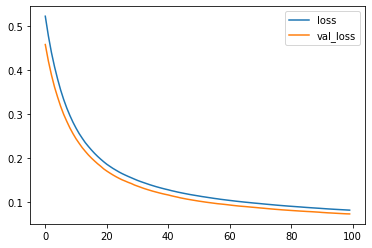

In [17]:
# Plot what's returned by model.fit
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss') # validation set
plt.legend()
plt.show()


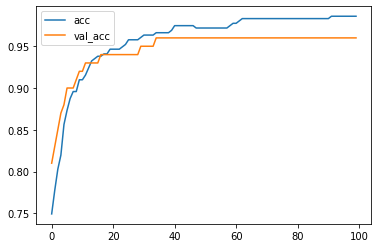

In [18]:
# Plot accuracy
plt.plot(r.history['accuracy'],label = 'acc')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()
plt.show()

In [19]:
# Make predictions
X_new = X_test[:5]
y_pred = model.predict(X_new)

In [20]:
for i in range(len(y_pred)):
  if y_pred[i] >=0.5:
    print(f'We predict person number {i+1} has a benign tumor.')
  else:
    print(f'We predict person number {i+1} has a malignant tumor.')

We predict person number 1 has a malignant tumor.
We predict person number 2 has a benign tumor.
We predict person number 3 has a malignant tumor.
We predict person number 4 has a benign tumor.
We predict person number 5 has a malignant tumor.


In [21]:
for i in range(len(y_pred)):
  if y_test[i]>=0.5:
    print(f'In reality person number {i+1} has a benign tumor.')
  else:
    print(f'In reality person number {i+1} has a malignant tumor.')


In reality person number 1 has a malignant tumor.
In reality person number 2 has a benign tumor.
In reality person number 3 has a malignant tumor.
In reality person number 4 has a benign tumor.
In reality person number 5 has a benign tumor.
